# Explorative Datenanalyse

### Lage- und Streuungsparameter

In [2]:
import pandas, pydataset

X = pydataset.data("trees") # black cherry trees sample dataset

ModuleNotFoundError: No module named 'pydataset'

In [3]:
type(X), X.shape

NameError: name 'X' is not defined

In [3]:
pandas.set_option('display.max_rows', 8)
X

,Girth,Height,Volume
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
...,...,...,...
28,17.9,80,58.3
29,18.0,80,51.5
30,18.0,80,51.0
31,20.6,87,77.0


In [4]:
X.mean()

Girth     13.248387
Height    76.000000
Volume    30.170968
dtype: float64

In [5]:
X.median()

Girth     12.9
Height    76.0
Volume    24.2
dtype: float64

In [6]:
X.quantile([0.25, 0.5, 0.75]) # quartiles

,Girth,Height,Volume
0.25,11.05,72.0,19.4
0.50,12.90,76.0,24.2
0.75,15.25,80.0,37.3


In [7]:
X.max() - X.min() # ranges

Girth     12.3
Height    24.0
Volume    66.8
dtype: float64

In [8]:
X.describe()

,Girth,Height,Volume
count,31.000000,31.000000,31.000000
mean,13.248387,76.000000,30.170968
std,3.138139,6.371813,16.437846
min,8.300000,63.000000,10.200000
25%,11.050000,72.000000,19.400000
50%,12.900000,76.000000,24.200000
75%,15.250000,80.000000,37.300000
max,20.600000,87.000000,77.000000


In [9]:
X.var() ** 0.5 # sqrt(variance) = standard deviation

Girth      3.138139
Height     6.371813
Volume    16.437846
dtype: float64

In [10]:
import numpy as np

x = (1, 2, 3, 4, 5)
sum((x - np.mean(x)) ** 2) / len(x) # uncorrected sample variance

2.0

In [11]:
np.mean(x)

3.0

In [12]:
np.var(x) # uncorrected sample variance

2.0

In [13]:
X.mad() # mean absolute deviations

Girth      2.556296
Height     5.096774
Volume    13.164412
dtype: float64

### Boxplot

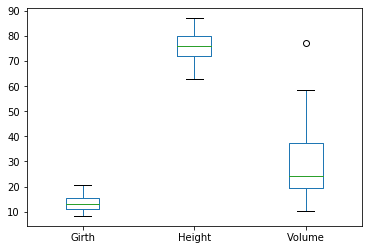

In [14]:
%matplotlib inline 

X.plot.box() # boxplot

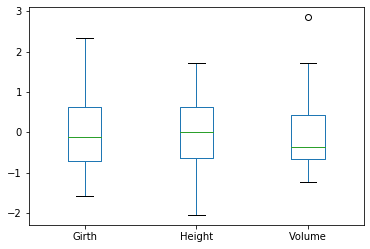

In [15]:
# Z-transformation
X_scaled = (X - X.mean()) / X.std()

X_scaled.plot.box() # boxplot

In [16]:
X_scaled.mean()

Girth    -4.727401e-16
Height    5.013910e-17
Volume    1.146037e-16
dtype: float64

In [17]:
X_scaled.std()

Girth     1.0
Height    1.0
Volume    1.0
dtype: float64

### Histogramm

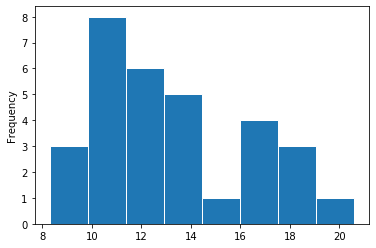

In [18]:
X["Girth"].plot.hist(bins=8, edgecolor="white") # histogram

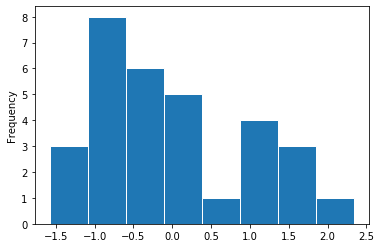

In [19]:
X_scaled["Girth"].plot.hist(bins=8, edgecolor="white")

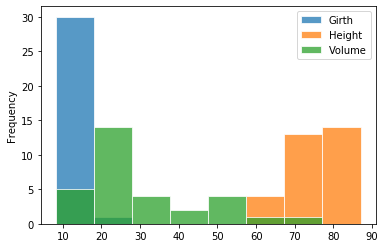

In [20]:
X.plot.hist(bins=8, edgecolor="white", alpha=0.75)

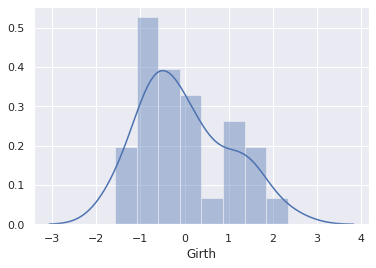

In [21]:
import seaborn as sns

sns.set() # set seaborn defaults
sns.distplot(X_scaled["Girth"], bins=8)

### Streuungsdiagramm

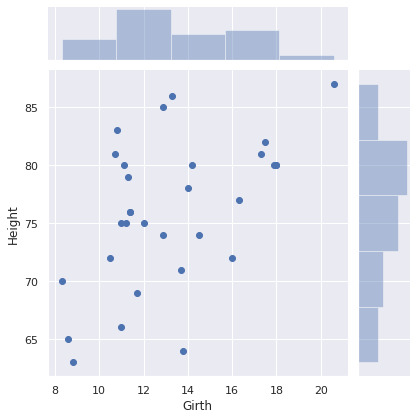

In [22]:
sns.jointplot(x=X['Girth'], y=X['Height'], kind="scatter")

0.5192800719499371

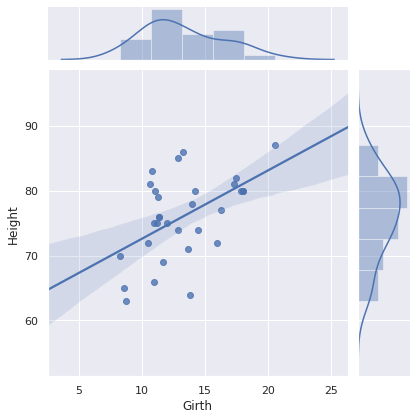

In [23]:
sns.jointplot(x=X['Girth'], y=X['Height'], kind="reg")

import scipy
scipy.stats.pearsonr(X['Girth'], X['Height'])[0]

0.9671193682556305

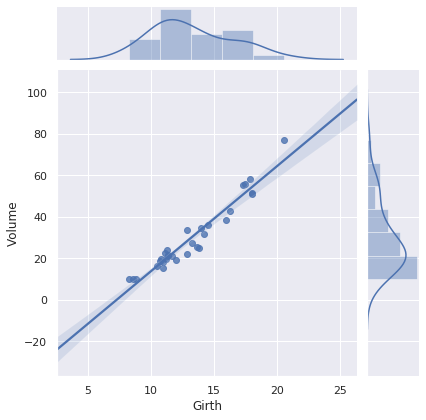

In [24]:
sns.jointplot(x=X['Girth'], y=X['Volume'], kind="reg")

scipy.stats.pearsonr(X['Girth'], X['Volume'])[0]